In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

import tensorflow as tf

plt.style.use("seaborn")

/home/jcartus/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [14]:
dim_in = 10

def target_function(t):
    return np.cos(np.sum(t, 1)).reshape(-1, 1)
    
def sample_data(n_samples):
    t = np.random.normal(size=(n_samples, dim_in))
    return t, target_function(t)

train = sample_data(7000)
test = sample_data(3000)

In [7]:
def build_nn(t, activation, n_hidden):

    # input layer
    nn = tf.layers.dense(t, 10, activation=activation)
    
    # hidden
    for i in range(n_hidden):
        nn = tf.layers.dense(nn, 10, activation=activation)
    
    # output layer
    return tf.layers.dense(nn, 1, activation=None)

In [8]:
x = tf.placeholder(shape=[None, dim_in], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

nn = build_nn(x, tf.nn.elu, n_hidden=2)
cost = tf.reduce_mean((y - nn) **2)
traing_step = tf.train.AdamOptimizer().minimize(cost)

In [22]:
cost_log = ([],[])
test_min= 1e10
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(5000):
        _, cost_train = sess.run([traing_step, cost], feed_dict={x:train[0], y:train[1]})
        cost_test = sess.run(cost, feed_dict={x: test[0], y: test[1]})
        
        cost_log[0].append(cost_train)
        cost_log[1].append(cost_test)
        
        if cost_test < test_min:
            test_min = cost_test
print(cost_test)

0.003945148


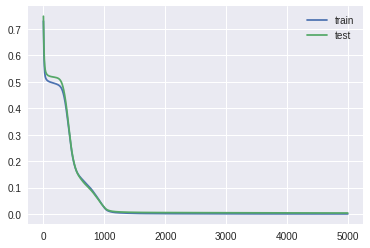

In [23]:
plt.plot(cost_log[0], label="train")
plt.plot(cost_log[1], label="test")
plt.legend()
plt.show()